In [30]:
# Import PyTorch Data Loader Library
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.models.segmentation import fcn_resnet50

# Other Library Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom Imports
from DRAC_Dataloading import DRAC_Loader
from DRAC_Models import ResNetBinary
from DRAC_Training import train_model
from DRAC_Testing import test_model
from DRAC_Criterion import DiceLoss

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(0))

cuda:0
NVIDIA RTX A5000


In [24]:
# load model "./model/fcn_resnet50_4_2.pth"
model = fcn_resnet50(pretrained=False, num_classes=3)
model.load_state_dict(torch.load("./models/fcn_resnet50_4_2.pth"))

<All keys matched successfully>

In [25]:
batch_size = 4

In [26]:
test_data = DRAC_Loader(data_type = 'test', transform = None)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

torch.Size([4, 3, 1024, 1024])
First


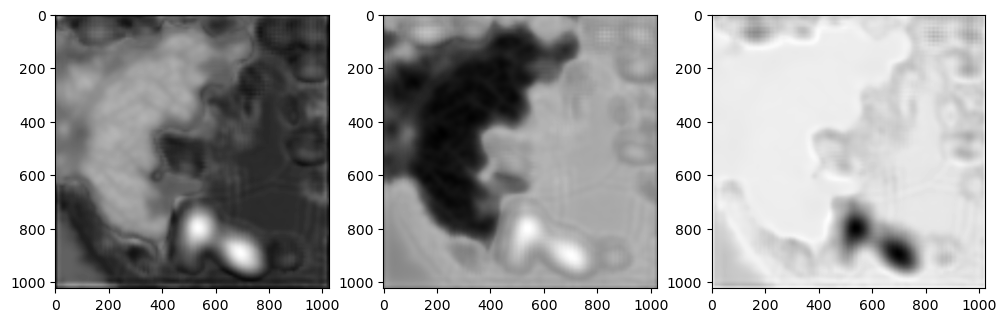

Second


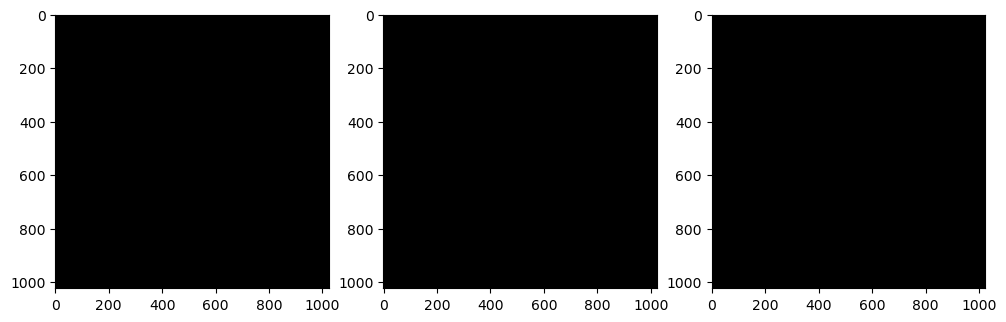

In [40]:
model.eval()  # Set model to evaluation mode
model.to(device)

with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        for mask in masks:
            mask = mask.to(device)
        
        # Permute the dimensions of the images
        images = images.permute(0, 3, 1, 2)
        
        # Forward pass
        outputs = model(images)
        print(outputs['out'].shape)
        
        # Print each of the 3 channels in black and white in a 3 subplot grid
        print("First")
        plt.figure(figsize=(12, 4))
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.imshow(outputs['out'][0, i, :, :].cpu().numpy(), cmap='gray')
        plt.show()

        # Print the 3 masks in a 3 subplot grid
        print("Second")
        plt.figure(figsize=(12, 4))
        for i in range(3):
            plt.subplot(1, 3, i+1)
            plt.imshow(masks[i][0,:,:].cpu().numpy(), cmap='gray')
        plt.show()
        
        # Get the predicted class label
        _, preds = torch.max(outputs['out'], 1)
        
        # Convert the predicted class label to numpy
        preds = preds.cpu().numpy()
        
        # Calculate the accuracy of the model
        break